## Denoising signal using low pass butterworth filter!!

### SIGNAL DENOISING!!

### MODULES USED:
1. scipy.signal.butter(N, Wn, btype='low', analog=False, output='ba', fs=None)

   Butterworth digital and analog filter design. Design an Nth-order digital or analog Butterworth filter and return the filter coefficients.
   
   
2. scipy.signal.freqz(b, a=1, worN=512, whole=False, plot=None, fs=6.283185307179586, include_nyquist=False)
    
   Compute the frequency response of a digital filter.
   
   
3. scipy.signal.lfilter(b, a, x, axis=- 1, zi=None)

    Filter data along one-dimension with an IIR or FIR filter. Filter a data sequence, x, using a digital filter.


In [1]:
# import required library

import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

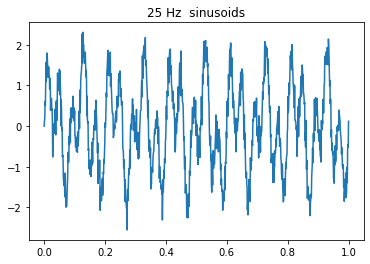

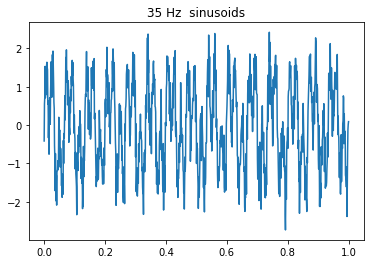

In [2]:
# sampling frequqncy
fs = 1000

# Generate 1000 samples in 1 sec
t = np.linspace(0, 1, fs)

# read the following text file 
with open('signal_25.txt') as f:
    sig1 = [float(line.strip()) for line in f.readlines()]
    
# read the following text file 
with open('signal_35.txt') as f:
    sig2 = [float(line.strip()) for line in f.readlines()]
    
# plot the noisy signal
plt.plot(t, sig1)
plt.title('25 Hz  sinusoids')
plt.show()

# plot the noisy signal
plt.plot(t, sig2)
plt.title('35 Hz  sinusoids')
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


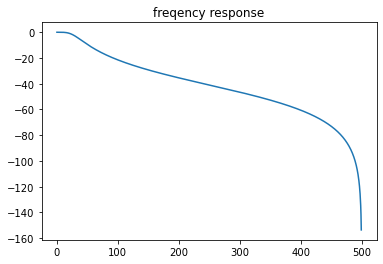

In [3]:
# create low pass butteworth filter
order = 2

fc = 30  # cut off frequency

wc = 2*fc/fs # normalise

[b,a] = signal.butter(order, wc, btype = 'lowpass')

[w,h] = signal.freqz(b, a, worN = 1024)

w = fs*w/(2*np.pi)   # freq response


plt.plot(w, 20*np.log10(h))
plt.title("freqency response")
plt.show()


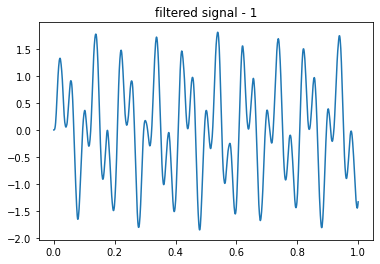

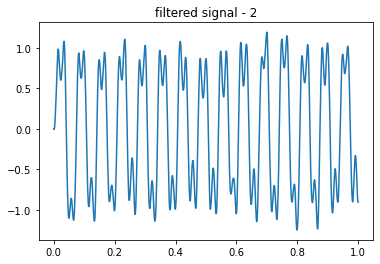

In [4]:
# filter signal
xf1 = signal.lfilter(b,a,sig1)

# filter signal
xf2 = signal.lfilter(b,a,sig2)


plt.plot(t,xf1)
plt.title('filtered signal - 1')
plt.show()

plt.plot(t,xf2)
plt.title('filtered signal - 2')
plt.show()

### IMAGE DENOISING!!

### MODULES USED:
1. scipy.fftpack.fft2(x, shape=None, axes=(- 2, - 1), overwrite_x=False).

    2-D discrete Fourier transform. Return the 2-D discrete Fourier transform of the 2-D argument x.
    
    
2. matplotlib.colors.LogNorm(vmin=None, vmax=None, clip=False)
    
   Normalize a given value to the 0-1 range on a log scale.
   
   
3. scipy.ndimage.gaussian_filter(input, sigma, order=0, output=None, mode='reflect', cval=0.0, truncate=4.0)
    
   Multidimensional Gaussian filter.

Text(0.5, 1.0, 'Original image')

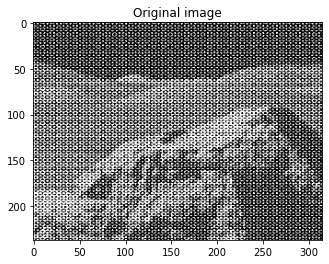

In [5]:
import numpy as np
import matplotlib.pyplot as plt

im = plt.imread('noisy.png').astype(float)

plt.figure()
plt.imshow(im, plt.cm.gray)
plt.title('Original image')

Text(0.5, 1.0, 'Fourier transform')

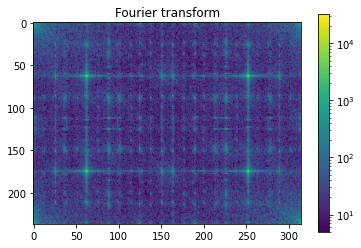

In [6]:
from scipy import fftpack
im_fft = fftpack.fft2(im)

# Show the results

def plot_spectrum(im_fft):
    from matplotlib.colors import LogNorm
    # A logarithmic colormap
    plt.imshow(np.abs(im_fft), norm=LogNorm(vmin=5))
    plt.colorbar()

plt.figure()
plot_spectrum(im_fft)
plt.title('Fourier transform')

Text(0.5, 1.0, 'Filtered Spectrum')

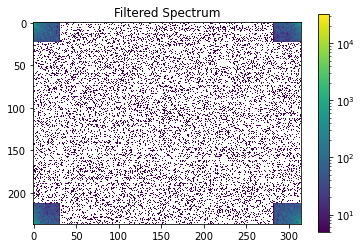

In [7]:
# Define the fraction of coefficients (in each direction) we keep
keep_fraction = 0.1

# Call ff a copy of the original transform. Numpy arrays have a copy method for this purpose.
im_fft2 = im_fft.copy()

# Set r and c to be the number of rows and columns of the array.
r, c = im_fft2.shape

# Set to zero all rows with indices between r*keep_fraction and r*(1-keep_fraction):
im_fft2[int(r*keep_fraction):int(r*(1-keep_fraction))] = 0

# Similarly with the columns:
im_fft2[:, int(c*keep_fraction):int(c*(1-keep_fraction))] = 0

plt.figure()
plot_spectrum(im_fft2)
plt.title('Filtered Spectrum')


Text(0.5, 1.0, 'Reconstructed Image')

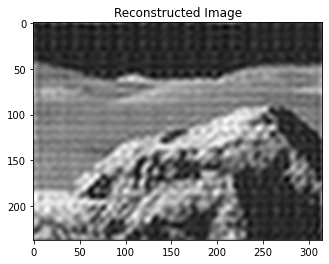

In [8]:
# Reconstruct the denoised image from the filtered spectrum, keep only the
# real part for display.
im_new = fftpack.ifft2(im_fft2).real

plt.figure()
plt.imshow(im_new, plt.cm.gray)
plt.title('Reconstructed Image')



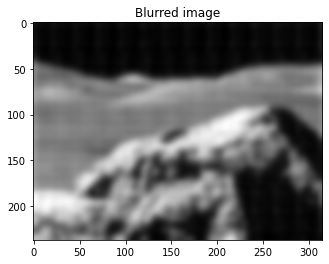

In [9]:
from scipy import ndimage
im_blur = ndimage.gaussian_filter(im, 4)

plt.figure()
plt.imshow(im_blur, plt.cm.gray)
plt.title('Blurred image')
plt.show()
